<a href="https://colab.research.google.com/github/elgin-vuong/MelanomaNoMore/blob/main/Hacklytics24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import cv2
import os
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import to_categorical
! pip install prettytable

In [ ]:
from google.colab import files
files.upload()

In [ ]:
! pip install --user kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images
! unzip melanoma-skin-cancer-dataset-of-10000-images.zip

In [ ]:
# os.chdir('/content/melanoma_cancer_dataset/test/benign')
#os.chdir('~')

# test
test_dir = '/content/melanoma_cancer_dataset/test'

test_benign = test_dir + '/benign'
test_malignant = test_dir + '/malignant'

# training
train_dir = '/content/melanoma_cancer_dataset/train'

train_benign = train_dir + '/benign'
train_malignant = train_dir + '/malignant'

In [ ]:
# test_benign_data = []
# test_benign_type = []
# i = 9605
# pathExists = True
# while pathExists:
#   # image = cv2.imread(f"{test_benign}/melanoma_{i}.jpg")
#   pathname = Path(f'{test_benign}/melanoma_{i}.jpg')
#   if pathname.exists():
#     img = plt.imread(f"{test_benign}/melanoma_{i}.jpg")
#     test_benign_type.append("benign")
#     test_benign_data.append(img)
#     i+=1
#   else:
#     pathExists = False

# len(test_benign_data)

500

In [ ]:
# test_malignant_data = []
# test_malignant_type = []

# i = 10105
# pathExists = True
# while pathExists:
#   pathname = Path(f'{test_malignant}/melanoma_{i}.jpg')
#   if pathname.exists():
#     img = plt.imread(f'{test_malignant}/melanoma_{i}.jpg')
#     test_malignant_data.append(np.resize(img,(64,64)))
#     test_malignant_type.append("malignant")
#     i+=1
#   else:
#     pathExists = False

# len(test_malignant_data)

500

In [ ]:
# test_benign_data.extend(test_malignant_data)
# len(test_benign_data)
# test_benign_type.extend(test_malignant_type)
# len(test_benign_type)

1000

In [ ]:
# train_benign_data = []
# train_benign_type = []
# i = 0
# pathExists = True
# while pathExists:
#   # image = cv2.imread(f"{test_benign}/melanoma_{i}.jpg")
#   # image
#   pathname = Path(f'{train_benign}/melanoma_{i}.jpg')
#   if pathname.exists():
#     img = plt.imread(f"{train_benign}/melanoma_{i}.jpg")
#     train_benign_data.append(img)
#     train_benign_type.append("benign")

#     i+=1
#   else:
#     pathExists = False

# len(train_benign_data)
# # train_benign_names

# train_benign_names

5000

In [ ]:
# train_malignant_data = []
# train_malignant_type = []
# i = 5000
# pathExists = True
# while pathExists:
#   # image = cv2.imread(f"{test_benign}/melanoma_{i}.jpg")
#   # image
#   pathname = Path(f'{train_malignant}/melanoma_{i}.jpg')
#   if pathname.exists():
#     img = plt.imread(f"{train_malignant}/melanoma_{i}.jpg")
#     train_malignant_data.append(img)
#     train_malignant_type.append("malignant")
#     i+=1
#   else:
#     pathExists = False
# len(train_malignant_data)
# # train_benign_names

In [ ]:
# train_benign_data.extend(train_malignant_data)
# len(train_benign_data)
# train_benign_type.extend(train_malignant_type)
# len(train_benign_type)

9605

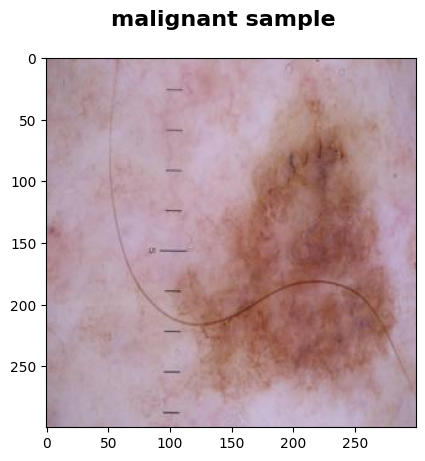

In [ ]:
img = plt.imread('/content/melanoma_cancer_dataset/test/malignant/melanoma_10105.jpg')
plt.imshow(img)
plt.suptitle('malignant sample', fontsize=16, weight='bold');

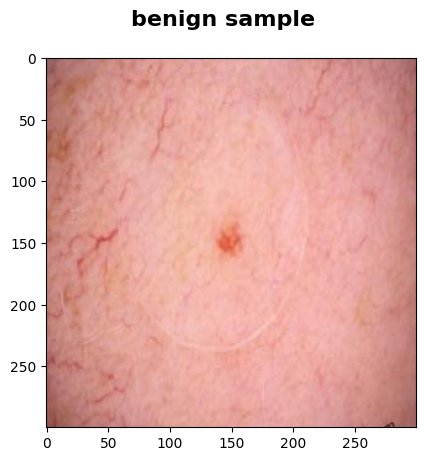

In [ ]:
img = plt.imread('/content/melanoma_cancer_dataset/test/benign/melanoma_10100.jpg')
plt.imshow(img)
plt.suptitle('benign sample', fontsize=16, weight='bold');

In [ ]:
(train_benign_data, train_benign_type), (test_benign_data, test_benign_type) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_benign_data, test_benign_data = train_benign_data / 255.0, test_benign_data/ 255.0

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 20,
                                   validation_split = 0.25,
                                   horizontal_flip = True)

training_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size = (64, 64),
                                                 batch_size = 64,
                                                 class_mode = 'binary')
training_labels = training_set.classes

Found 9605 images belonging to 2 classes.


In [ ]:
len(training_set)

151

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255,
                                  validation_split = 0.25)
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 64,
                                            class_mode = 'binary')

test_labels = test_set.classes
test_labels

Found 1000 images belonging to 2 classes.


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
model = tf.keras.models.Sequential()

model.add(Conv2D(32, (3,3), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(32, (3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Conv2D(32, (3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))



model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss="binary_crossentropy", optimizer="adam",metrics=['accuracy'])
model.summary()

In [ ]:
epochs = 3
history = model.fit(x = training_set, validation_data = test_set, epochs = epochs)

# monitor = ModelCheckpoint('./model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')

#history = model.fit(train_benign_data, train_benign_type, epochs = 2, validation_data = (test_benign_data, test_benign_type), shuffle = True, callbacks = [monitor])
#plot_acc(history)
plt.subplot(1,2,2)
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlim(0,5)
plt.ylim(0.7,1.0)
plt.legend()
plt.tight_layout()
plt.xticks(np.arange(1, epochs+1, step=1))


In [ ]:
predictions = model.predict(test_set)

for prediction in predictions:
  prediction[0] = np.round(prediction[0])

predictions


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_dir,
                                            target_size = (64, 64),
                                            batch_size = 1,
                                            class_mode = 'binary')

test_labels = test_set.classes

Found 1000 images belonging to 2 classes.


In [ ]:
from sklearn.metrics import fbeta_score
fbeta_score(predictions, test_labels, average='macro', beta=0.5)


0.4295719201158311

In [ ]:
cm = confusion_matrix(test_labels, predictions)
cm
tp  = cm[1][1]
tn  = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]

print('True positive: %d'%tp)
print('True negative: %d'%tn)
print('False positive: %d'%fp)
print('False negative: %d'%fn)

precision = 1.0 * tp / (tp+fp)
recall = 1.0*tp / (tp+fn)
print('Precision:', precision)
print('Recall:', recall)

True positive: 489
True negative: 15
False positive: 485
False negative: 11
Precision: 0.502053388090349
Recall: 0.978


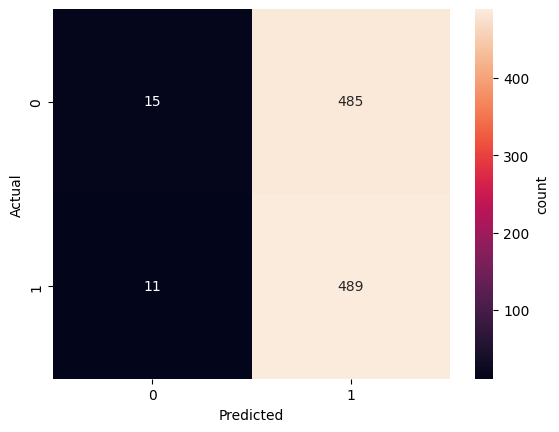

In [ ]:
sns.heatmap(cm, annot = True, fmt = 'd', cbar_kws={'label':'count'});
plt.ylabel('Actual');
plt.xlabel('Predicted');

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(10))

In [ ]:
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# history = model.fit(train_benign_data, train_benign_type, epochs=10,
#                     validation_data=(test_benign_data, test_benign_type))

In [ ]:
# # Specify the Column Names while initializing the Table
# myTable = PrettyTable(["ID", "Label", "Split"])
# # Add rows
# i = 1
# while i < 501:
#   myTable.add_row([i, "Benign", test_benign_data[i-1]])
#   i += 1


# print(myTable)


VGG_16 model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
vgg_plus = VGG16(weights = 'imagenet', include_top = False, input_shape = (64, 64, 3))

In [ ]:
vgg_model = Sequential()
vgg_model.add(vgg_plus)

vgg_model.add(GlobalAveragePooling2D())
vgg_model.add(Dense(8, activation = 'relu'))
vgg_model.add(Dropout(0.3))
vgg_model.add(Dense(4, activation = 'relu'))
vgg_model.add(Dense(2, activation = 'relu'))
vgg_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
vgg_model.compile(loss = 'categorical_crossentropy', optimizer = optimizers.SGD(learning_rate = 1e-4, momentum = 0.95), metrics = ['accuracy'])

In [ ]:
monitor = ModelCheckpoint('./model.h5', monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
history = vgg_model.fit(x=training_set, validation_data=test_set, epochs=2, shuffle = True, callbacks = [monitor])

In [ ]:
plt.subplot(1,2,2)
plt.title('Train and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlim(0,5)
plt.ylim(0.25,1.0)
plt.legend()
plt.tight_layout()
plt.xticks(np.arange(1, epochs+1, step=1))